In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data

In [8]:
adf = load_data('Advertising').drop(columns=['Unnamed: 0'])
adf

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Estimating the coefficients

let ($x_1$, $y_1$), ($x_2$, $y_2$), .... ($x_n$, $y_n$) represent n observation pairs

$\hat{y}_i = \hat{\beta_0} + \hat{\beta_1} x_i$ be the prediction of $Y$ based on the $i^{th}$ value of $X$

$e_{i} = y_{i} - \hat{y_{i}}$ represents the $i^{th}$ residual

Residual sum of squares(RSS) = $e_{1}^2$ + $e_{2}^2$ + ..... + $e_{n}^2$

least square approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize RSS


$$
\hat f(\hat{\beta_0},\hat{\beta_1})
  \;=\;
  \min_{\hat{\beta_0},\hat{\beta_1}}\;
  \sum_{i=1}^{n}\bigl(y_i - \hat{\beta_0} - \hat{\beta_1} x_i\bigr)^2
$$

The minimum occurs where the partial derivatives vanish:

$$
\frac{\partial f}{\partial \hat{\beta_k}}=0,
\qquad k\in\{0,1\}.
$$

Explicitly,

$$
\begin{cases}
\displaystyle
\frac{\partial f}{\partial \hat{\beta_0}}
= -2\sum_{i=1}^{n}\bigl(y_i-\hat{\beta_0}-\hat{\beta_1} x_i\bigr)=0,\\[10pt]
\displaystyle
\frac{\partial f}{\partial \hat{\beta_1}}
= -2\sum_{i=1}^{n}x_i\bigl(y_i-\hat{\beta_0}-\hat{\beta_1} x_i\bigr)=0.
\end{cases}
$$

Solving this, 

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
$$

where $\bar{y} = \frac{\sum_{i=1}^{n} y_i}{n}$ and $\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$ are sample means


In [15]:
# estimate the coefficients for sales vs tv
b1 = np.sum((adf["TV"] - adf["TV"].mean()) * (adf["sales"] - adf["sales"].mean())) / np.sum((adf["TV"] - adf["TV"].mean()) ** 2)
b0 = adf["sales"].mean() - b1 * adf["TV"].mean()
b0, b1

(np.float64(7.0325935491276965), np.float64(0.047536640433019736))

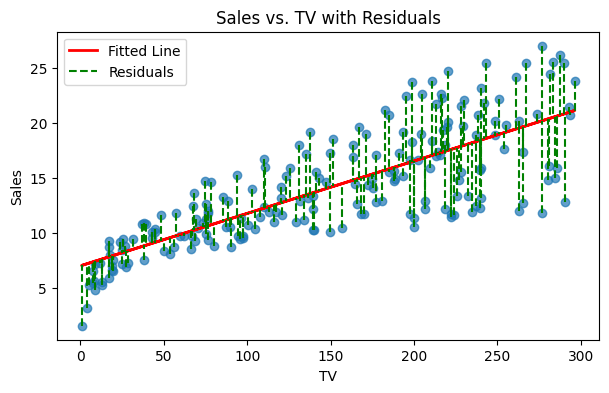

In [20]:
# plot a line b0 + b1 * adf['TV'] and the residuals
residuals = adf["sales"] - (b0 + b1 * adf["TV"])
plt.figure(figsize=(7, 4))
plt.scatter(adf["TV"], adf["sales"], alpha=0.7)
plt.plot(adf["TV"], b0 + b1 * adf["TV"], color  ='red', linewidth=2, label='Fitted Line')
plt.vlines(adf["TV"], adf["sales"], b0 + b1 * adf["TV"], color='green', linestyle='--', label='Residuals')
plt.xlabel("TV")     # label x-axis
plt.ylabel("Sales")  # label y-axis
plt.title("Sales vs. TV with Residuals")  # add a title
plt.legend()  # show legend
plt.show()

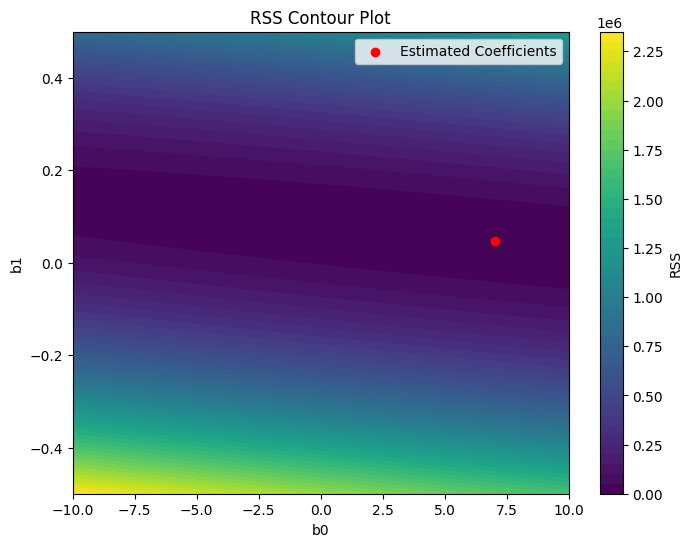

In [25]:
# vary b0 and b1 and compute RSS contour plot

def compute_rss(b0, b1):
    """Compute the Residual Sum of Squares (RSS) for given b0 and b1."""
    y_pred = b0 + b1 * adf["TV"]
    residuals = adf["sales"] - y_pred
    rss = np.sum(residuals ** 2)
    return rss
b0_values = np.linspace(-10, 10, 100)
b1_values = np.linspace(-0.5, 0.5, 100)
B0, B1 = np.meshgrid(b0_values, b1_values)
RSS = np.array([[compute_rss(b0, b1) for b0 in b0_values] for b1 in b1_values])
plt.figure(figsize=(8, 6))
plt.contourf(B0, B1, RSS, levels=50, cmap='viridis')
plt.colorbar(label='RSS')
plt.xlabel("b0")
plt.ylabel("b1")
plt.title("RSS Contour Plot")
plt.scatter(b0, b1, color='red', label='Estimated Coefficients')
plt.legend()
plt.show()

#### Accuracy of coefficient estimates

$Y = f(X) + \epsilon$ where $\epsilon$ is the mean zero random error term, we assume that the error term is independent of X

$Y = \beta_{0} + \beta_{1}X + \epsilon$ is the population regression line which is the best linear approximation to the true relationship between X and Y

In [68]:
# using 100 random Xs generate Y = 2 + 3X + e where e is a random gaussian error term
X = np.random.rand(100) * 4 - 2
e = np.random.randn(100) * 2
Y = 2 + 3 * X + e

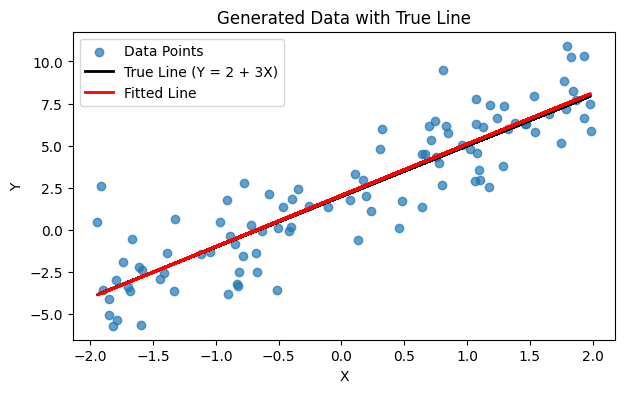

In [69]:
# plot the data and the fitted line
b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
b0 = Y.mean() - b1 * X.mean()

# plot line Y = 2+3X together with the data points
plt.figure(figsize=(7, 4))
plt.scatter(X, Y, alpha=0.7, label='Data Points')
plt.plot(X, 2 + 3 * X, color='black', linewidth=2, label='True Line (Y = 2 + 3X)')
plt.plot(X, b0 + b1 * X, color="red", linewidth=2, label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Data with True Line")  
plt.legend()
plt.show()

In [70]:
b0, b1

(np.float64(2.0553266154651766), np.float64(3.0375438684739673))

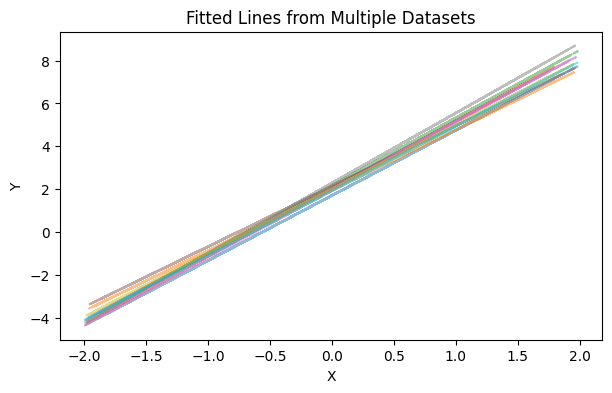

In [72]:
# generate multiple datasets and plot the fitted lines
num_datasets = 10
plt.figure(figsize=(7, 4))
for _ in range(num_datasets):
    X = np.random.rand(100) * 4 - 2
    e = np.random.randn(100) * 2
    Y = 2 + 3 * X + e
    b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
    b0 = Y.mean() - b1 * X.mean()
    plt.plot(
        X,
        b0 + b1 * X,
        "--",
        alpha=0.5,
    )
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitted Lines from Multiple Datasets")
plt.show()  

The estimated coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ won't be exactly equal to $\beta_0$ and $\beta_1$, but if we could average the estimates obtained over a huge number of datasets, then they would be the same.

We estimate the population mean of a random variable Y by $\mu$, how accurate is the sample mean $\hat{\mu}$ as an estimate of $\mu$? 
How far off will the single estimate of $\hat{\mu}$ be -> standard estimate of $\hat{\mu}$

$$
Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n}
$$

where $\sigma$ is the standard deviation of each of the realizations $y_i$ of Y. 

Similarly, standard errors associated with $\hat{\beta_0}$ and $\hat{\beta_1}$ are:

$$
SE(\hat{\beta_0})^2 = \sigma^2 * \bigl(\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\bigr)
$$
$$
SE(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

where $\sigma^2$ = Var($\epsilon$) and assuming that errors $\epsilon_i$ for each observation have common variance $\sigma^2$ and are uncorrelated

$\sigma^2$ is unknown but can be estimated from the data. $\sigma$ is known as the residual standard error and is given by $RSE = \sqrt{RSS/(n-2)}$

$SE(\hat{\beta_1})^2$ is smaller when the $x_i$ are more spread out as intuitively we have more leverage to estimate the slope

$SE(\hat{\beta_0})^2$ is the same as $SE(\hat{\mu})$ when $\hat{x}$ is zero(when $\hat{\beta_0}$ is equal to $\bar{y}$)

Standard errors can be used to compute confidence intervals. 95% confidence interval is defined as the range of values such that with 95% probability, the range will contain the true unknown value of the parameter. 

For linear regression, there is 95% chance that the interval

$$
[\hat{\beta_1} - 2 * SE(\hat{\beta_1}), \hat{\beta_1} + 2 * SE(\hat{\beta_1})]
$$

will contain the true value of $\beta_1$, similarly for $\beta_0$


#### Hypothesis tests

null hypothesis $H_0$: There is no relationship between X and Y, $\beta_1 = 0$

alternative hypothesis $H_a$: There is some relationship between X and Y, $\beta_1 \ne 0$

$\hat{\beta_1}$ should be sufficiently far from 0 to reject the null hypothesis, it depends on $SE(\hat{\beta_1})$

t-statistic is given by 

$$
t = \frac{\hat{\beta_1} - 0}{SE(\hat{\beta_1})}
$$

and it measures the number of standard deviations $\hat{\beta_1}$ is away from 0. If there is really no relationship between X and Y then we expect t to have t-distribution with n-2 degrees of freedom
 
p-value: probability of observing any number of equal to $|t|$ or larger in absolute value assuming $\beta_1$ = 0

a small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance

small p-value: reject the null hypothesis


In [76]:
# calculate p-values and summary for the coefficients
X = sm.add_constant(adf["TV"])  # add constant term for intercept
model = sm.OLS(adf["sales"], X).fit()  # fit the model
display(model.summary())
display(model.pvalues)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.47e-42
Time:                        17:28:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    1.406300e-35
TV       1.467390e-42
dtype: float64

#### Accuracy of the model

Residual standard error(RSE) is an estimate of the standard deviation of $\epsilon$, average amount that the response will deviate from the true regression line. It is measure of lack of fit of the model.

$$
RSE = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n-2}}
$$

$R^2$ statistic: proportion of variation explained

$$
R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}
$$

where $TSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$

TSS: measures total variance in the response Y

RSS: amount of variability that is left unexplained after performing the regression

TSS-RSS: amount of variability in the response that is explained by performing the regression

$R^2$: close to 1 indicates large proportion of the variability in the response is explained by regression

For simple linear regression, squared correlation and $R^2$ are identical

$$
Cor(X, Y) = \frac{\sum_{i=1}^{n}(x_i - \hat{x})(y_i - \hat{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \hat{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \hat{y})^2}}
$$


In [79]:
# calculate RSE for sales vs tv, use the model fitted above
rss = np.sum((adf["sales"] - model.predict(X)) ** 2)
n = len(adf["sales"])
rse = np.sqrt(rss / (n - 2))  # n-2
print(f"Residual Sum of Squares (RSS): {rss:.2f}")
print(f"Number of observations (n): {n}")
print(f"Residual Standard Error (RSE): {rse:.2f}")


Residual Sum of Squares (RSS): 2102.53
Number of observations (n): 200
Residual Standard Error (RSE): 3.26


#### Multiple linear regression

$$
Y = \beta_0 + \beta_1X1 + \beta_2X2 + .... + \beta_pXp
$$

$$
RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2 = \sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_{i1} - \hat{\beta_2}x_{i2}......-\hat{\beta_p}x_{ip})^2
$$

The coefficients that minimize RSS are the multiple least squares regression coefficient estimates.

In [81]:
# using linear algebra estimate the coefficients of slaes vs tv, radio and newspaper
# beta = (X^T * X)^-1 * X^T * y
X = adf[["TV", "radio", "newspaper"]]
X = sm.add_constant(X)  # add constant term for intercept
y = adf["sales"]
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y  # calculate coefficients using normal equation
coefficients

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [85]:
# use statsmodels to fit the model and get the coefficients
model = sm.OLS(y, X).fit()  # fit the model 
display(model.summary())  # display the summary of the model

# note that simple and multiple regression coefficients for the same predictor can be quite different

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.58e-96
Time:                        12:22:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

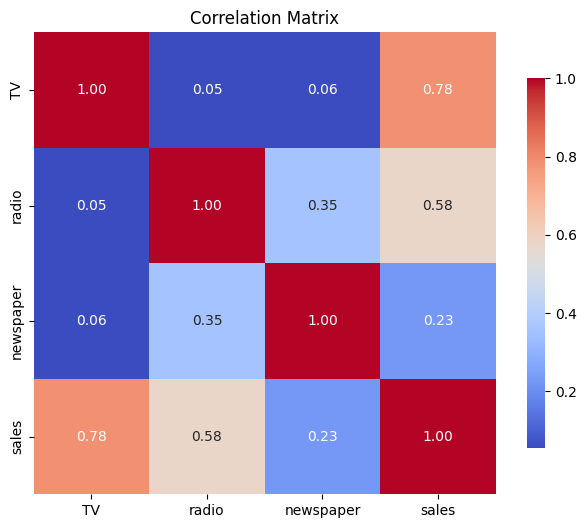

In [91]:
# correlation matrix, show values in the matrix
import seaborn as sns
correlation_matrix = adf.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()  

In the multiple regression case the coefficient of newspaper is not significant even though it was significant in the simple linear regression case.

Look at the corr(35%) between radio and newspaper, we can conclude that newspaper advertising is a surrogate for radio advertising.

Consider an example of regression of shark attacks vs ice cream sales that shows positive relationship(same as sales and newspaper). There is no (direct)relationship between ice cream sales and shark attacks, it can be explained by the more people visiting the beach, resulting in more ice cream sales and shark attacks.

##### Is there a relationship between the response and the predictors?

null hypothesis $H_0$: $\beta_0 = \beta_1 = \beta_2 = .... = \beta_p = 0$

altervative hypothesis $H_a$: at least one $\beta_j$ is non zero

F statistic:
$$
F = \frac{(TSS - RSS) / p}{RSS / (n - p - 1)}
$$

If the linear model assumptions are correct, $E[RSS/(n-p-1)] = \sigma^2$

If $H_0$ is true, $E[(TSS - RSS) / p] = \sigma^2$ and F is close to 1. On the other hand, if $H_a$ is true, $E[(TSS - RSS) / p] > \sigma^2$ and F is greater than 1.

When $H_0$ is true and the errors $\epsilon_i$ have a normal distribution, the F-statistic follows the F-distribution. Use the p-value associated with the F-statistic for a given n and p to determine whether or not to reject $H_0$.

To test whether a subset of q of the coefficients are zero, $H_0$: $\beta_{p-q+1}$ = $\beta_{p-q+2}$ = ..... = $\beta_{p}$ = 0

We fit a second model that uses all other predictors, except those q and the residual sum of squares for that model is $RSS_0$. Then the F-statistic to use is 
$F = \frac{(RSS_0 - RSS)/q}{RSS/(n - p - 1)}$

When the t-statistics are p-values for individual predictors are reported(these are adjusted for the other predictors), it is equivalent to the F-test that omits the single variable from the model leaving all others in, i.e. q = 1. 

If the p-values for any one of the individual variables is small, then it is not necessary that at least one of the predictors is related to the response(especially when p is large).


##### Deciding on important variables
